In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [2]:
### código inicial 

train = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

# DUDA - ver por qué hay duplicados y como son
train = train.drop_duplicates('text')

drop_columns = ['location','keyword']
target = train.pop('target')
train=train.drop(columns=drop_columns)
test=test.drop(columns=drop_columns)


train['text'] = train['text'].str.replace("#", "").replace("_", " ")
test['text'] = test['text'].str.replace("#", "").replace("_", " ")


#Importing preprocessor and defining preprocess function
!pip install tweet-preprocessor
import preprocessor as p

def preprocess_tweet(row):
    text = row['text']
    text = p.clean(text)
    return text

#Cleaning train dataset

train['text'] = train.apply(preprocess_tweet, axis=1)
test['text'] = test.apply(preprocess_tweet, axis=1)

from nltk.corpus import stopwords
stop = stopwords.words('english')

train['text'] = train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
test['text'] = test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#Removing extra white spaces and punctuation, and applying lowercase

train['text'] = train['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')
test['text'] = test['text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

train_data = train
test_data = test

### código final

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: The default value of regex will change from True to False in a future version.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: The default value of regex will change from True to False in a future version.


In [3]:
#Required for the preprocessor to work
!pip install -q -U "tensorflow-text==2.8.*"

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
tfx-bsl 1.8.0 requires google-api-python-client<2,>=1.7.11, but you have google-api-python-client 2.48.0 which is incompatible.
tfx-bsl 1.8.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.8.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-io 0.21.0 requires tensorflow<2.7.0,>=2.6.0, but you have tensorflow 2.8.2 which is incompatible.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, but you have tensorflow-io-gcs-filesystem 0.26.0 which is incompatible.
grpcio-status 1.46.3 requires grpcio>=1.46.3, but you have grpcio 1.43.0 which is incompatible.
google-cloud-aiplatform 0.6.0a1 requires google-cloud-storage<2.0.0dev,>=1

In [4]:
#Required for AdamW
!pip install -q tf-models-official==2.7.0

In [5]:
import shutil

import tensorflow as tf
import tensorflow_hub as hub 
import tensorflow_text as text
from official.nlp import optimization

tf.get_logger().setLevel('ERROR')

2022-06-28 15:31:45.987993: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-06-28 15:31:45.988096: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/opt/conda/lib/python3.7/site-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.4.0 and strictly below 2.7.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.2 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure yo

In [6]:
batch_size = 32
disaster_ds = tf.data.Dataset.from_tensor_slices((train_data['text'], target)).batch(batch_size)

2022-06-28 15:31:50.916709: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:
2022-06-28 15:31:50.916779: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 15:31:50.916817: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (936d1017f7b2): /proc/driver/nvidia/version does not exist
2022-06-28 15:31:50.918509: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the

In [7]:
#Test of the training set contains the desired data
for row in disaster_ds.take(2):
    print(row)

(<tf.Tensor: shape=(32,), dtype=string, numpy=
array([b'our deeds reason earthquake may allah forgive us',
       b'forest fire near la ronge sask canada',
       b'all residents asked shelter place notified officers no evacuation shelter place orders expected',
       b'people receive wildfires evacuation orders california',
       b'just got sent photo ruby alaska smoke wildfires pours school',
       b'rockyfire update california hwy closed directions due lake county fire cafire wildfires',
       b'flood disaster heavy rain causes flash flooding streets manitou colorado springs areas',
       b'i m top hill i see fire woods ',
       b'there s emergency evacuation happening building across street',
       b'i m afraid tornado coming area ',
       b'three people died heat wave far',
       b'haha south tampa getting flooded hah wait a second i live in south tampa what am i gonna do what am i gonna do fvck flooding',
       b'raining flooding florida tampabay tampa days i ve lost co

In [8]:
encoder_url ='https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1'
preprocessor_url='https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [9]:
preprocessor = hub.KerasLayer(preprocessor_url)

In [10]:
def build_bert_classifier():
  tweet = tf.keras.layers.Input(shape=(), dtype=tf.string, name='tweets')
  preprocessing_layer = hub.KerasLayer(preprocessor_url, name='preprocessing')
  encoder_inputs = preprocessing_layer(tweet)
  encoder = hub.KerasLayer(encoder_url, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(tweet, net)

In [11]:
#Test if the model works on sample text
bert_tweet_classifier = build_bert_classifier()

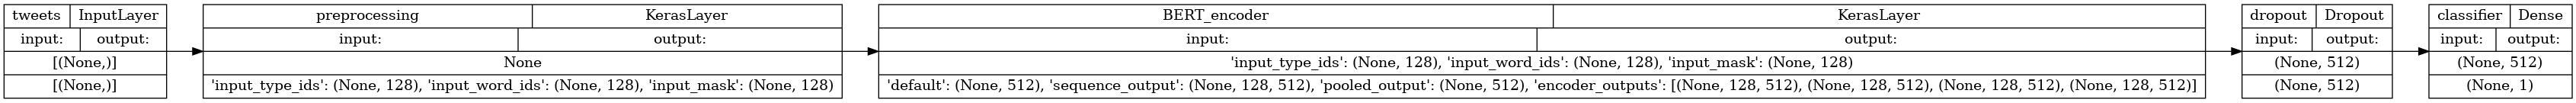

In [12]:
tf.keras.utils.plot_model(bert_tweet_classifier,show_shapes=True,rankdir='LR')

In [13]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()
epochs = 4
steps_per_epoch = tf.data.experimental.cardinality(disaster_ds).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')
bert_tweet_classifier.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)
print(f'Training model with {encoder_url}')
history = bert_tweet_classifier.fit(x=disaster_ds,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/4
235/235 [==============================] - 1223s 5s/step - loss: 0.5689 - binary_accuracy: 0.7182
Epoch 2/4
235/235 [==============================] - 1270s 5s/step - loss: 0.4078 - binary_accuracy: 0.8266
Epoch 3/4
235/235 [==============================] - 1166s 5s/step - loss: 0.3442 - binary_accuracy: 0.8535
Epoch 4/4
235/235 [==============================] - 1040s 4s/step - loss: 0.3067 - binary_accuracy: 0.8741


In [14]:
#Predicting state of test data
preds = bert_tweet_classifier(test_data['text'])

2022-06-28 16:51:38.498709: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1710751744 exceeds 10% of free system memory.
2022-06-28 16:51:44.421686: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1710751744 exceeds 10% of free system memory.
2022-06-28 16:52:01.927638: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3421503488 exceeds 10% of free system memory.
2022-06-28 16:52:09.909939: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 3421503488 exceeds 10% of free system memory.
2022-06-28 16:52:29.298751: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1710751744 exceeds 10% of free system memory.


In [15]:
#Get the sigmoid ranges from the data
sigpreds= tf.sigmoid(preds)

In [16]:
#Recast to 0 and 1
sigpreds = sigpreds*2
sigpreds=np.floor(sigpreds).astype(int)

In [17]:
sigpreds=sigpreds.reshape(-1) #Flatten array

(array([2008.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1255.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

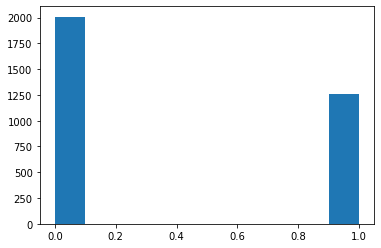

In [18]:
#Plot a histogram 
plt.hist(sigpreds)

In [19]:
# Preparamos la entrega
dfsub = pd.DataFrame({'id' : test_data['id'].to_list(),'target': sigpreds})
dfsub.to_csv('submission.csv', index=False)
dfsub = pd.read_csv('submission.csv')
dfsub

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
